Project Overview 
Objective: To answer the question: What zip code in Louisville sees the biggest number of animal services citations? 

Data Source: This data source comes from https://louisville-metro-opendata-lojic.hub.arcgis.com/datasets/LOJIC::louisville-metro-ky-animal-services-citation/explore.  It has each violation from 1/2020 to 8/2024 so that should be clear to see after the analysis.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd

df = pd.read_csv('C:/Users/Melis/Documents/Projects/Louisville-Citations-DA-Project/Louisville-Metro-KY-Animal-Services-Citation.csv')

print(df.head())

  violationnumber violationtype       form           violationdate  \
0      V21-015598    CIT DD/PDD    N918843  2021/01/17 05:00:00+00   
1      V21-015607    CIT DD/PDD    N918844  2021/01/21 02:05:00+00   
2      V21-015607    CIT DD/PDD    N918844  2021/01/21 02:05:00+00   
3      V20-015523     CIVIL PEN  02-100917  2020/12/30 22:47:00+00   
4      V21-015608       WARNING   01-50238  2021/01/21 14:08:00+00   

     casenumber               casetype          officer violationjurisdiction  \
0  A21-087966-1  INVESTIGAT ANI ATTACK   OFFICER FORNER                 40218   
1  A21-088032-2  INVESTIGAT ANI ATTACK   OFFICER FORNER                 40291   
2  A21-088032-2  INVESTIGAT ANI ATTACK   OFFICER FORNER                 40291   
3  A20-087312-8       OWNED AGGRESSIVE   OFFICER FORNER                 40216   
4  A21-088042-1       INVESTIGAT NEGLI  OFFICER RATLIFF                 40207   

      court docket       appearancedate          outcomedate outcomestat  \
0       NaN    N

In [4]:
df.drop(columns=['form', 'officer', 'receipt', 'casenumber', 'court', 'docket', 'appearancedate', 'outcomedate', 'offense'], inplace=True)

print (df)

      violationnumber violationtype           violationdate  \
0          V21-015598    CIT DD/PDD  2021/01/17 05:00:00+00   
1          V21-015607    CIT DD/PDD  2021/01/21 02:05:00+00   
2          V21-015607    CIT DD/PDD  2021/01/21 02:05:00+00   
3          V20-015523     CIVIL PEN  2020/12/30 22:47:00+00   
4          V21-015608       WARNING  2021/01/21 14:08:00+00   
...               ...           ...                     ...   
25852      V22-020151      CITATION  2022/11/10 19:22:00+00   
25853      V22-020320           NaN  2022/12/05 21:26:00+00   
25854      V20-015499           NaN  2020/12/25 14:22:00+00   
25855      V22-020218      CITATION  2022/11/21 16:25:00+00   
25856      V20-013684      CITATION  2020/02/10 20:39:00+00   

                    casetype violationjurisdiction outcomestat  ObjectId  
0      INVESTIGAT ANI ATTACK                 40218        VOID         1  
1      INVESTIGAT ANI ATTACK                 40291         NaN         2  
2      INVESTIGAT 

In [5]:
#Handled missing values - I dont want to drop the whole row if one column is missing some data, so I want to leave as is. It is already showing NaN where any missing values are 
# Drop rows with invalid or missing Zip Codes
df.drop(df[df['violationjurisdiction'].isin(['OUT OF COUNTY', 'ZONE 1'])].index, inplace=True)

print(df)

      violationnumber violationtype           violationdate  \
0          V21-015598    CIT DD/PDD  2021/01/17 05:00:00+00   
1          V21-015607    CIT DD/PDD  2021/01/21 02:05:00+00   
2          V21-015607    CIT DD/PDD  2021/01/21 02:05:00+00   
3          V20-015523     CIVIL PEN  2020/12/30 22:47:00+00   
4          V21-015608       WARNING  2021/01/21 14:08:00+00   
...               ...           ...                     ...   
25852      V22-020151      CITATION  2022/11/10 19:22:00+00   
25853      V22-020320           NaN  2022/12/05 21:26:00+00   
25854      V20-015499           NaN  2020/12/25 14:22:00+00   
25855      V22-020218      CITATION  2022/11/21 16:25:00+00   
25856      V20-013684      CITATION  2020/02/10 20:39:00+00   

                    casetype violationjurisdiction outcomestat  ObjectId  
0      INVESTIGAT ANI ATTACK                 40218        VOID         1  
1      INVESTIGAT ANI ATTACK                 40291         NaN         2  
2      INVESTIGAT 

In [6]:
#I want to take off the time stamp as it is unecessary
df['violationdate'] = pd.to_datetime(df['violationdate'])
df['violationdate'] = df['violationdate'].dt.date

print (df)

      violationnumber violationtype violationdate               casetype  \
0          V21-015598    CIT DD/PDD    2021-01-17  INVESTIGAT ANI ATTACK   
1          V21-015607    CIT DD/PDD    2021-01-21  INVESTIGAT ANI ATTACK   
2          V21-015607    CIT DD/PDD    2021-01-21  INVESTIGAT ANI ATTACK   
3          V20-015523     CIVIL PEN    2020-12-30       OWNED AGGRESSIVE   
4          V21-015608       WARNING    2021-01-21       INVESTIGAT NEGLI   
...               ...           ...           ...                    ...   
25852      V22-020151      CITATION    2022-11-10                    NaN   
25853      V22-020320           NaN    2022-12-05                    NaN   
25854      V20-015499           NaN    2020-12-25                    NaN   
25855      V22-020218      CITATION    2022-11-21                    NaN   
25856      V20-013684      CITATION    2020-02-10                    NaN   

      violationjurisdiction outcomestat  ObjectId  
0                     40218        

In [7]:
zip_code_counts = df['violationjurisdiction'].value_counts().reset_index()

zip_code_counts.columns = ['violationjurisdiction', 'Zip Code Count']

print("\nZip Code Counts:")
print(zip_code_counts)

total_instances = len(df)

print(f"\nTotal Instances in Dataset: {total_instances}")


Zip Code Counts:
   violationjurisdiction  Zip Code Count
0                  40218           11311
1                  40216            1250
2                  40215            1226
3                  40212            1127
4                  40272            1121
5                  40211            1024
6                  40214             935
7                  40219             719
8                  40258             629
9                  40210             593
10                 40208             479
11                 40203             478
12                 40291             448
13                 40229             446
14                 40213             417
15                 40299             362
16                 40245             331
17                 40118             312
18                 40220             267
19                 40206             215
20                 40223             179
21                 40228             166
22                 40241             16

In [8]:
zip_code_counts['Percentage'] = (zip_code_counts['Zip Code Count'] / total_instances) * 100

print("\nZip Code Counts with Percentage:")
print(zip_code_counts)


Zip Code Counts with Percentage:
   violationjurisdiction  Zip Code Count  Percentage
0                  40218           11311   43.754594
1                  40216            1250    4.835403
2                  40215            1226    4.742563
3                  40212            1127    4.359599
4                  40272            1121    4.336389
5                  40211            1024    3.961162
6                  40214             935    3.616881
7                  40219             719    2.781324
8                  40258             629    2.433175
9                  40210             593    2.293915
10                 40208             479    1.852926
11                 40203             478    1.849058
12                 40291             448    1.733008
13                 40229             446    1.725272
14                 40213             417    1.613090
15                 40299             362    1.400333
16                 40245             331    1.280415
17          

Descriptive Statistics: (Provide summary statistics (mean, median, min, max) for numerical columns.):  My dataset does not include numerical columns to be able to summarize statistics 

   violationjurisdiction  Zip Code Count  Percentage
0                  40218           11311   43.754594
1                  40216            1250    4.835403
2                  40215            1226    4.742563
3                  40212            1127    4.359599
4                  40272            1121    4.336389
5                  40211            1024    3.961162
6                  40214             935    3.616881
7                  40219             719    2.781324
8                  40258             629    2.433175
9                  40210             593    2.293915
10                 40208             479    1.852926
11                 40203             478    1.849058
12                 40291             448    1.733008
13                 40229             446    1.725272
14                 40213             417    1.613090
15                 40299             362    1.400333
16                 40245             331    1.280415
17                 40118             312    1.

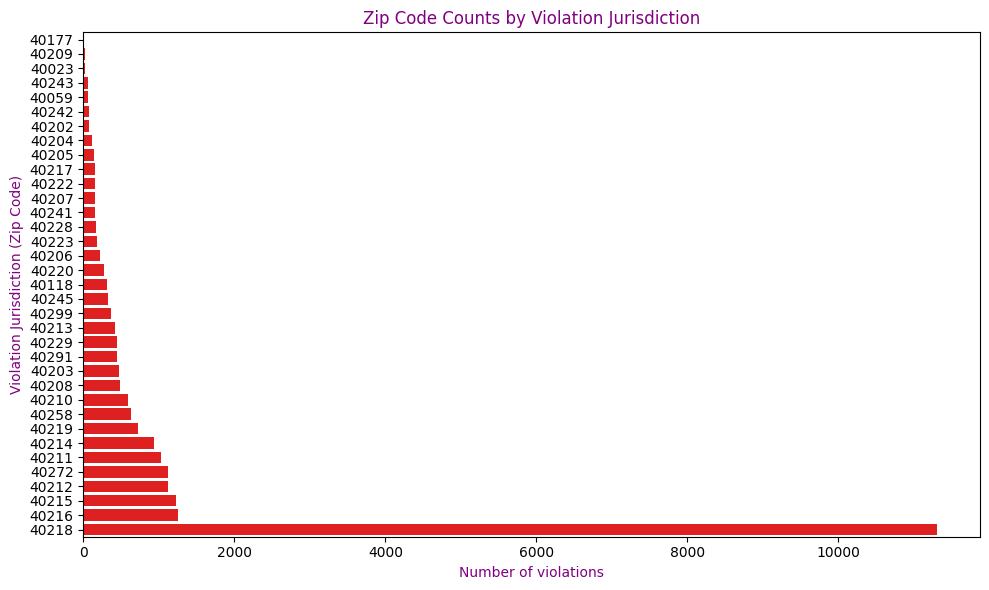

In [9]:
df = pd.DataFrame(zip_code_counts)

df_sorted = df.sort_values(by='Zip Code Count', ascending=True)

print(df)

fig, ax1 = plt.subplots(figsize=(10, 6))

sns.barplot(x='Zip Code Count', y='violationjurisdiction', data=df_sorted, ax=ax1, color='red')

ax1.set_xlabel("Number of violations", color='purple')
ax1.set_ylabel("Violation Jurisdiction (Zip Code)", color='purple')
ax1.tick_params(axis='x', labelcolor='black')

plt.title("Zip Code Counts by Violation Jurisdiction", color='purple')
plt.tight_layout()

plt.show()

From 1/2020 to 8/2024, we can see that the 40218 zip code has a significant number of violations compared to even the second largest culprit.  The next highest has 10,000 less violations in the 40216 zip code.  From this analysis, I beleive that there should be more education presented to neighborhoods in this area to better educate what deems a violation.  Also, I would next love to know what types of dogs are typically involved (if there is any correlation).  And I would love to see if any of these violations are repeat offenders.  Granted, I just analyzed occurences, but i would further analyze and combine instances to see what I could gather from that information.
